# 3. Descrição das atividades 
Implementar três classificadores de dígitos contidos no dataset MNIST, utilizando os três 
modelos lineares de Aprendizagem de Máquina (AM) estudados: Perceptron, Regressão 
Linear e Regressão Logística. Detalhes da implementação estão descritas a seguir.

## 3.1. Redução da dimensão das amostras 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix
import sklearn
import random

In [2]:
def read_instance(filepath):
    data = pd.read_csv(filepath)
    return(data)

### Intensidade

In [3]:
def intensidade(data):
    intensidade = []
    data = np.array(data)
    for i in range(len(data)):
        intensidade.append(sum(data[i])/255)#somatorio da linha divido por 255
    return intensidade

### Simetria

In [4]:
#mudança pra velocidade foi apenas fazer com np array
def simetria(data):
    list_simetria = []
    data = np.array(data)
    for k in range(len(data)):#pular linha
        soma_line_horizontal = 0
        soma_line_vertical = 0
        tamanho = len(data[k])
        
        for i in range(28):#vertical
            for j in range(14):#entre pixels das metades  
                img_inicial = data[k][28*i+j]
                img_final = data[k][28*i+(27-j)]
                soma_line_vertical += abs(img_inicial - img_final)
        
        for i in range(tamanho-1,int(tamanho/2),-1):#horizontal do fim até a metade iterando com -1
            img_inicial = data[k][i]
            img_final = data[k][abs(i-tamanho)]
            soma_line_horizontal += abs(img_inicial - img_final)
            
        soma = (soma_line_vertical+soma_line_horizontal)/2
        list_simetria.append(soma/255)
    
    return list_simetria

### Train_redu.csv Teste_redu.csv

In [5]:
def reduced(filepath):#reduzir um arquivo usando simetria e intensidade
    data =  read_instance(filepath)
    label = data['label']
    data = data.drop(columns=['Unnamed: 0'])
    data = data.drop(columns=['label'])
    intensidade_data = intensidade(data)
    simetria_data = simetria(data)
    redu_data = pd.DataFrame({'Label':label,'intensidade': intensidade_data,'simetria': simetria_data})
    return redu_data

In [6]:
#recebe arquivo csv reduz e tranforma em csv novamente 
'''train = reduced("train.csv")
train.to_csv("train_redu.csv")
test = reduced("test.csv")
test.to_csv("test_redu.csv")'''


'train = reduced("train.csv")\ntrain.to_csv("train_redu.csv")\ntest = reduced("test.csv")\ntest.to_csv("test_redu.csv")'

In [7]:
train_redu = read_instance("train_redu.csv")
train_redu = train_redu.drop(columns=["Unnamed: 0"])

In [8]:
test_redu = read_instance("test_redu.csv")
test_redu = test_redu.drop(columns=["Unnamed: 0"])

>Realizar um filtro nos dados dos arquivos train_redu.csv e test_redu.csv, deixando apenas as imagens com valores 1 ou 5 na coluna label, construindo as instâncias  train1x5 e test1x5;

## Classificação dos dígitos A x B

### Realizar um filtro AxB

In [9]:
#atualizado

In [10]:
def data_x_y(train_redu,test_redu,primaria,secundaria):
    values = [primaria,secundaria]

    train = train_redu[train_redu.Label.isin(values)]
    test = test_redu[test_redu.Label.isin(values)]

    x_train, y_train = train.drop(columns=['Label']) , train['Label']
    y_train = y_train.values.reshape(-1,1)
    x_train = np.column_stack((np.ones((x_train.shape[0],1)),x_train,))


    x_test, y_test = test.drop(columns=['Label']), test['Label']
    y_test = y_test.values.reshape(-1,1)
    x_test = np.column_stack((np.ones((x_test.shape[0],1)),x_test))
    
    return x_train,y_train,x_test,y_test

In [65]:
#variavel de controle
primaria = 1
secundaria = 2

In [66]:
x_train,y_train,x_test,y_test = data_x_y(train_redu,test_redu,primaria,secundaria)

### Plotar os dados de train AxB

Text(0, 0.5, 'simetria')

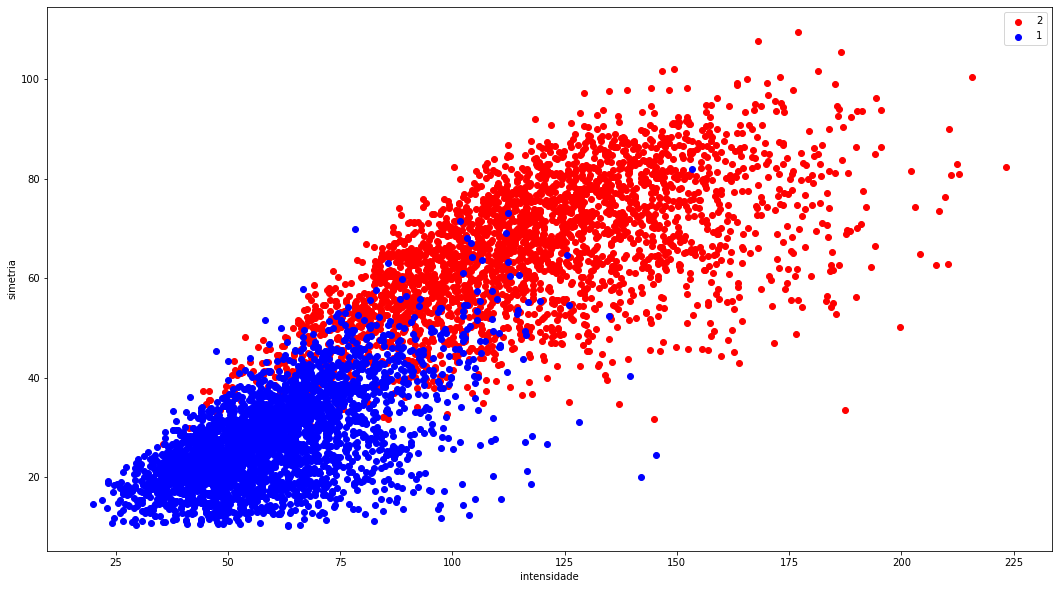

In [67]:
p1 = [secundaria]
p2 = [primaria]
x = train_redu[train_redu.Label.isin(p1)]
#testx5 = test_redu[test_redu.Label.isin(cinco)]
y = train_redu[train_redu.Label.isin(p2)]
#testx1 = test_redu[test_redu.Label.isin(um)]
#plot1x5(trainx5,trainx1)

figure = plt.figure(figsize=(18,10))
axis = figure.add_subplot(111)
axis.scatter(x.values[:,1], x.values[:,2], color='red',marker='o',label = secundaria)
axis.scatter(y.values[:,1], y.values[:,2], color='blue',marker='o',label = primaria)
axis.legend(loc="best")
plt.xlabel('intensidade')
plt.ylabel('simetria')

# Começo da atualização

## Perceptron 

In [68]:
class perceptron:
    def __init__(self, n_iter, primaria,secundaria):
        self.n_iter = n_iter
        self.primaria = primaria
        self.secundaria = secundaria
    
    def predict(self, x):
       
        net = np.dot(x, self.w_[1:] + self.w_[0])
        return np.where(net>=0.0, self.secundaria, self.primaria)

    
    def fit(self, x, y):
        self.w_ = np.zeros(1+x.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(x, y):
                update = (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
            
    def get_w_(self):
        return self.w_
    
    

In [69]:
ppn = perceptron( n_iter = 10, primaria = primaria, secundaria = secundaria)
ppn.fit(x_train,y_train)
y_pred = ppn.predict(x_test)

In [70]:
mc = confusion_matrix(y_test.ravel(), y_pred)
print('consufion matrix\n',mc,'\n---------------------------------------------------------------')
print('classification report\n',sklearn.metrics.classification_report(y_test,y_pred,zero_division= 0))

consufion matrix
 [[1318  210]
 [  38 1338]] 
---------------------------------------------------------------
classification report
               precision    recall  f1-score   support

           1       0.97      0.86      0.91      1528
           2       0.86      0.97      0.92      1376

    accuracy                           0.91      2904
   macro avg       0.92      0.92      0.91      2904
weighted avg       0.92      0.91      0.91      2904



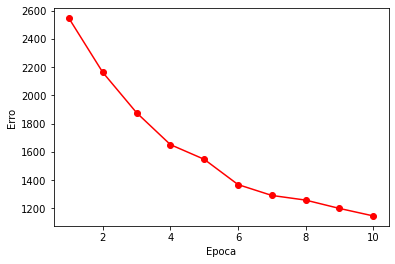

In [71]:
plt.plot(range(1,len(ppn.errors_)+1),ppn.errors_, marker = 'o', color='red')
plt.xlabel('Epoca')
plt.ylabel('Erro')
plt.show()

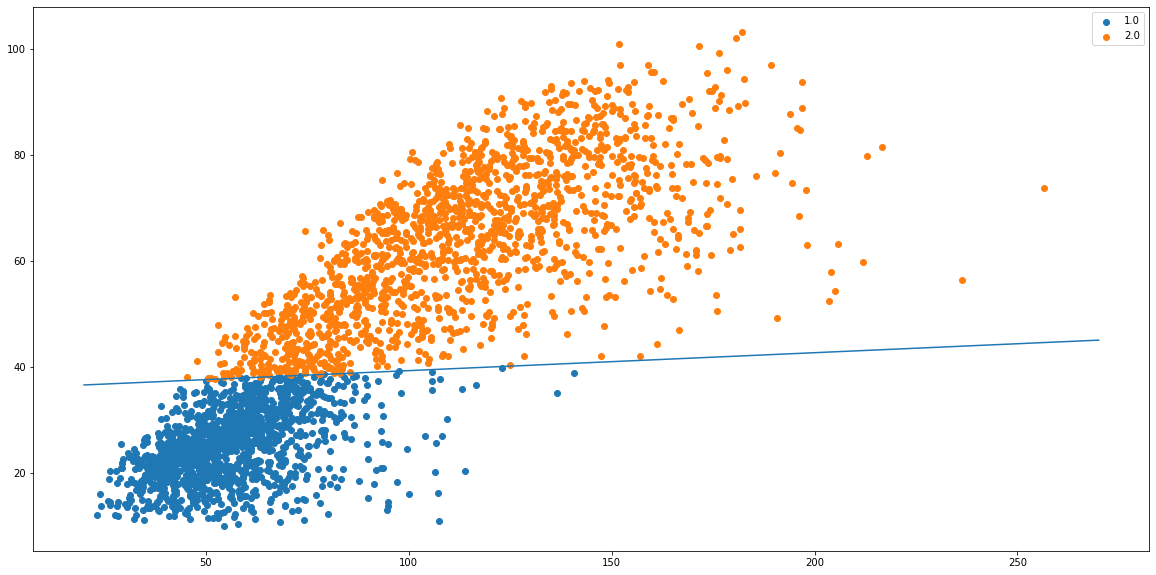

In [72]:
data = pd.DataFrame(np.column_stack((x_test,y_pred)), columns=['x0','x1','x2','class'])

classes = data['class'].unique()
w = ppn.w_[1:] + ppn.w_[0]
figure = plt.figure(figsize=(20,10))
axis = figure.add_subplot(111)

for classe in classes:
    valores =  data[data['class'] == classe].values
    y = valores[:,1]
    z = valores[:,2]
    axis.scatter(y,z, label=classe)

x_new = np.linspace(20,270,1000)

plt.plot(x_new, (-w[0] - w[1]*x_new)/w[2])
    
axis.legend()


## Regressão Linear

In [73]:
class LinearRegression_2:#correta
    def fit(self, x_train, y_train):
        x = np.array(list(map(lambda i: [1, i[1], i[2]], x_train)))


        x =  np.array(x)
        y =  np.array(y_train)
        xTx = np.dot(x.transpose(), x)
        inverse = np.linalg.inv(xTx)
        self.w = np.dot(np.dot( inverse, x.transpose()), y)

    def predict(self, x_test):

        x = np.array(list(map(lambda i: [1, i[1], i[2]], x_test)))

        return np.sign([np.dot(xn,self.w) for xn in x])

    def get_w(self):
        return self.w

In [74]:
def value_changer(y_train):
    new_y_train = np.where(y_train == 1,1,-1)
    return new_y_train.reshape(-1,1)

In [75]:
new_y_train = value_changer(y_train)# trocando os numeros por menos -1 e 1

In [76]:
lr = LinearRegression_2()
lr.fit(x_train,new_y_train)
y_pred_lr = lr.predict(x_test)

In [77]:
mc = confusion_matrix(value_changer(y_test), y_pred_lr.ravel())
display(mc)

array([[1239,  137],
       [  58, 1470]], dtype=int64)

In [78]:
print(sklearn.metrics.classification_report(value_changer(y_test),y_pred_lr))

              precision    recall  f1-score   support

          -1       0.96      0.90      0.93      1376
           1       0.91      0.96      0.94      1528

    accuracy                           0.93      2904
   macro avg       0.94      0.93      0.93      2904
weighted avg       0.93      0.93      0.93      2904



In [79]:
data = pd.DataFrame(np.column_stack((x_test,y_pred_lr)), columns=['x0','x1','x2','class'])

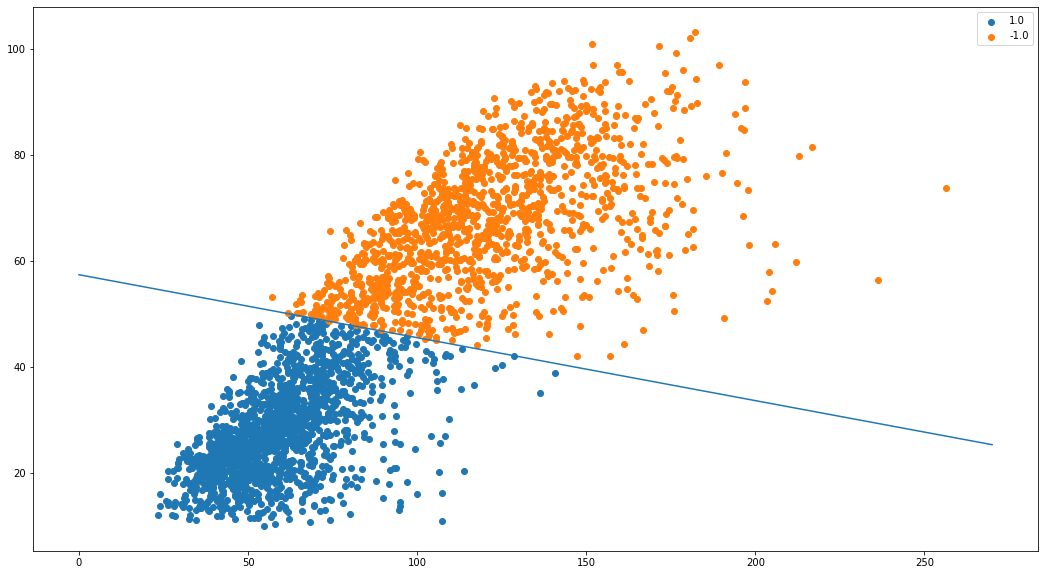

In [80]:
classes = data['class'].unique()

figure = plt.figure(figsize=(18,10))
axis = figure.add_subplot(111)

for classe in classes:
    valores =  data[data['class'] == classe].values
    y = valores[:,1]
    z = valores[:,2]
    axis.scatter(y,z, label=classe)

x_new = np.linspace(0,270,1000)

plt.plot(x_new, (-lr.get_w()[0] - lr.get_w()[1]*x_new)/lr.get_w()[2])
    
    
axis.legend()

## OVR sem sklearning

In [81]:
def data_x_y_z(train_redu,test_redu,primaria,secundaria,terciaria):
    values = [primaria,secundaria,terciaria]

    train = train_redu[train_redu.Label.isin(values)]
    test = test_redu[test_redu.Label.isin(values)]

    x_train, y_train = train.drop(columns=['Label']) , train['Label']
    y_train = y_train.values.reshape(-1,1)
    x_train = np.column_stack((np.ones((x_train.shape[0],1)),x_train,))


    x_test, y_test = test.drop(columns=['Label']), test['Label']
    y_test = y_test.values.reshape(-1,1)
    x_test = np.column_stack((np.ones((x_test.shape[0],1)),x_test))
    
    return x_train,y_train,x_test,y_test

In [82]:

#separe os numeros em hipoteses 1 2 e 3
#a primaria sempre sera 1 e a secundaria 10
#crie a lista de previsão tripla
h1 = 1
h2 = 2
h3 = 5

x_train_ovr ,y_train_ovr ,x_test_ovr ,y_test_ovr = data_x_y_z(train_redu,test_redu,h1,h2,h3)

y_train_ovr_h1 = np.where(y_train_ovr == h1,h1,10)
y_train_ovr_h2 = np.where(y_train_ovr == h2,h2,10)
y_train_ovr_h3 = np.where(y_train_ovr == h3,h3,10)

lista_pred = [None]*len(y_test_ovr)

In [83]:
#treine com 1vs10 onde 1 é h1 e 10 é (h2,h3)

In [84]:
ppn = perceptron( n_iter = 10, primaria = h1, secundaria = 10)#10
ppn.fit(x_train_ovr,y_train_ovr_h1)

y_pred = ppn.predict(x_test_ovr)
#hipotese 1
for i in range(len(y_pred)):
    if(y_pred[i] == h1):
        lista_pred[i] = h1

In [85]:
#treine com 1vs10 onde 1 é h2 e 10 é (h1,h3)

In [86]:
ppn = perceptron( n_iter = 10, primaria = h2, secundaria = 10)#29
ppn.fit(x_train_ovr,y_train_ovr_h2)
#aqui ele está sempre classificando como h2
y_pred = ppn.predict(x_test_ovr)
#hipotese 2
for i in range(len(y_pred)):
    if(y_pred[i] == h2 and lista_pred[i] == None):
        lista_pred[i] = h2
    elif(lista_pred[i] == None):
        lista_pred[i] = h3

In [87]:
mc = confusion_matrix(y_test_ovr, lista_pred)
print('consufion matrix\n',mc,'\n---------------------------------------------------------------')
print('classification report\n',sklearn.metrics.classification_report(y_test_ovr,lista_pred,zero_division= 0) )

consufion matrix
 [[1269    6  253]
 [  30  830  516]
 [  51  537  736]] 
---------------------------------------------------------------
classification report
               precision    recall  f1-score   support

           1       0.94      0.83      0.88      1528
           2       0.60      0.60      0.60      1376
           5       0.49      0.56      0.52      1324

    accuracy                           0.67      4228
   macro avg       0.68      0.66      0.67      4228
weighted avg       0.69      0.67      0.68      4228



# fim da atualização

In [88]:
x_train,y_train,x_test,y_test = data_x_y(train_redu,test_redu,1,5)
pla = Perceptron(tol=0.1,max_iter=100)

Atribuir o valor alvo 
𝑦 = +1 para a imagem com valor 𝑙𝑎𝑏𝑒𝑙 = 1 e 𝑦 = −1 para 𝑙𝑎𝑏𝑒𝑙 = 5; 

In [89]:

pla.fit(x_train, y_train.ravel())# x= caracteristicas(simetria,intensidade) y = label

Perceptron(max_iter=100, tol=0.1)

Criar um método de predição do dígito que retorne o valor 1 quando o 
classificador linear classificar a saída como 𝑦 = +1 e retorne o valor 5 quando 𝑦 =
−1;

In [90]:
def pre1x5(x):
    if (pla.predict([x]) == -1):
        return int(5)
    elif(pla.predict([x]) == 1):
        return int(1)

In [91]:
pre1x5(x_train[1]) == y_train[1]

array([ True])

# Sklearning

## Perceptron

In [92]:
pla = Perceptron(tol=0.1,max_iter=100)
pla.fit(x_train, y_train.ravel())
y_predtest_pla = pla.predict(x_test)

### Matriz de confusão e relatório de eficácia Perceptron

In [93]:
mc = confusion_matrix(y_test, y_predtest_pla)
display(mc)
print(sklearn.metrics.classification_report(y_test,y_predtest_pla))

array([[1137,  391],
       [  19, 1305]], dtype=int64)

              precision    recall  f1-score   support

           1       0.98      0.74      0.85      1528
           5       0.77      0.99      0.86      1324

    accuracy                           0.86      2852
   macro avg       0.88      0.86      0.86      2852
weighted avg       0.88      0.86      0.86      2852



## Linear regression sklearning


In [94]:
y_train_lr = np.where(y_train ==1,1,-1)
y_test_lr = np.where(y_test ==1,1,-1)
lr2 = LinearRegression()
lr2.fit(x_train, y_train_lr)

LinearRegression()

### Matriz de confusão e relatório de eficácia Regressão linear

In [95]:
y_predtest_linear = np.sign(lr2.predict(x_test))
confusion_matrix(y_test_lr,y_predtest_linear)

array([[1155,  169],
       [  92, 1436]], dtype=int64)

In [96]:
print(sklearn.metrics.classification_report(y_test_lr,y_predtest_linear))

              precision    recall  f1-score   support

          -1       0.93      0.87      0.90      1324
           1       0.89      0.94      0.92      1528

    accuracy                           0.91      2852
   macro avg       0.91      0.91      0.91      2852
weighted avg       0.91      0.91      0.91      2852



## Logistic Regression

In [97]:
lg = LogisticRegression()
lg.fit(x_train,y_train.ravel())

LogisticRegression()

### Matriz de confusão e relatório de eficácia Regressão logistica

In [98]:
y_predtest_logistic = lg.predict(x_test)
confusion_matrix(y_test,y_predtest_logistic)

array([[1410,  118],
       [ 134, 1190]], dtype=int64)

In [99]:
print(sklearn.metrics.classification_report(y_test,y_predtest_logistic))

              precision    recall  f1-score   support

           1       0.91      0.92      0.92      1528
           5       0.91      0.90      0.90      1324

    accuracy                           0.91      2852
   macro avg       0.91      0.91      0.91      2852
weighted avg       0.91      0.91      0.91      2852



## 3.3. Classificador de dígitos completo 


In [100]:
x_train, y_train = train_redu.drop(columns=['Label']), train_redu['Label']
x_test, y_test = test_redu.drop(columns=['Label']), test_redu['Label']

### Logistic Regression 'One-vs-Rest'

In [101]:
ovr_logistic = LogisticRegression(multi_class='ovr')
ovr_logistic.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

In [102]:
y_pred_logistic = ovr_logistic.predict(x_test)
score_ovr_logistic = ovr_logistic.score(x_test,y_test)

In [103]:
acuracia_ovr_logistic= sklearn.metrics.accuracy_score(y_test,y_pred_logistic)
#precisao_ovr_logistic=sklearn.metrics.precision_score(y_test,y_pred_logistic)
#recall_ovr_logistic=sklearn.metrics.recall_score(y_test,y_pred_logistic)
#f1_ovr_logistic=sklearn.metrics.f1_score(y_test,y_pred_logistic)

In [104]:
confusion_matrix(y_test,y_pred_logistic)

array([[ 685,   58,  257,   38,    0,    0,    0,  155,  114,   79],
       [   5, 1392,    1,    2,    0,    0,    0,   48,   12,   68],
       [ 331,   53,  347,   52,    0,    0,    0,  425,   63,  105],
       [ 341,   59,  301,   99,    0,    0,    0,  445,   86,  194],
       [ 136,  175,  132,   64,    0,    0,    0,  514,   84,  287],
       [ 207,  104,  169,   53,    0,    0,    0,  554,   70,  167],
       [ 282,   81,  242,   80,    0,    0,    0,  414,   83,  238],
       [  53,  100,  169,   48,    0,    0,    0, 1029,   16,  105],
       [ 416,  113,  240,   59,    0,    0,    0,  236,  132,  177],
       [ 161,  159,  129,   61,    0,    0,    0,  423,  112,  338]],
      dtype=int64)

In [105]:
acuracia_ovr_logistic

0.28270190482884655

In [106]:
#como diferenciar falso positivos de negativo em uma matriz 10x10?

### Linear Regression 'One-vs-Rest'

In [107]:
linear_model = LinearRegression()
ovr_linear = OneVsRestClassifier(linear_model)
ovr_linear.fit(x_train,y_train)

OneVsRestClassifier(estimator=LinearRegression())

In [108]:
y_pred_linear = ovr_linear.predict(x_test)
confusion_matrix(y_test,y_pred_linear)

array([[ 794,  241,  181,    0,    0,    0,    0,  170,    0,    0],
       [   8, 1508,    2,    0,    0,    0,    0,   10,    0,    0],
       [ 452,  272,  246,    0,    0,    0,    0,  406,    0,    0],
       [ 493,  393,  206,    0,    0,    0,    0,  433,    0,    0],
       [ 225,  673,   96,    0,    0,    0,    0,  398,    0,    0],
       [ 294,  448,  127,    0,    0,    0,    0,  455,    0,    0],
       [ 430,  441,  172,    0,    0,    0,    0,  377,    0,    0],
       [ 102,  468,  129,    0,    0,    0,    0,  821,    0,    0],
       [ 540,  429,  167,    0,    0,    0,    0,  237,    0,    0],
       [ 263,  728,   92,    0,    0,    0,    0,  300,    0,    0]],
      dtype=int64)

In [109]:
ovr_linear.score(x_test,y_test)

0.23680326140437197

### Perceptron 'One-vs-Rest'

In [110]:
pla_model = Perceptron()
ovr_pla = OneVsRestClassifier(pla_model)
ovr_pla.fit(x_train,y_train)

OneVsRestClassifier(estimator=Perceptron())

In [111]:
y_pred_pla = ovr_pla.predict(x_test)
confusion_matrix(y_test,y_pred_pla)

array([[   0,   84,    0,    0,    0,  225,    0,    0, 1077,    0],
       [   0, 1478,    0,    0,    0,   15,    0,    0,   35,    0],
       [   0,  162,    0,    0,    0,  478,    0,    0,  736,    0],
       [   0,  248,    0,    0,    0,  439,    0,    0,  838,    0],
       [   0,  482,    0,    0,    0,  421,    0,    0,  489,    0],
       [   0,  301,    0,    0,    0,  505,    0,    0,  518,    0],
       [   0,  292,    0,    0,    0,  406,    0,    0,  722,    0],
       [   0,  378,    0,    0,    0,  887,    0,    0,  255,    0],
       [   0,  209,    0,    0,    0,  264,    0,    0,  900,    0],
       [   0,  501,    0,    0,    0,  315,    0,    0,  567,    0]],
      dtype=int64)

In [112]:
ovr_pla.score(x_test,y_test)

0.20264286216349195